In [1]:
import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


import scikitplot as skplt

In [2]:
df= pd.read_csv('./data/positive_emotion_dataset.csv').drop(columns='Unnamed: 0')
df

,ad,pos_emo
0,i am proud and excited to be your mayor\nalex ...,1
1,proud to work with rep andy kim to secure mil...,1
2,in recent days i have received many questions ...,1
3,this is a fantastic idea we need to stopkavan...,1
4,in these deeply divided times connecting commu...,1
...,...,...
19995,from maggie thatcher to theresa may i know whi...,0
19996,vote is available in many areas across north ...,0
19997,you have to register before you can vote,0
19998,dana balter would put washington bureaucrats i...,0


In [3]:
X_train,  X_test, y_train, y_test  = train_test_split(df['ad'], df['pos_emo'], test_size =0.2  , random_state = 42)

In [4]:
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [5]:
clf =RandomForestClassifier(n_estimators=100)
clf.fit(X_train_tf, y_train)

RandomForestClassifier()

accuracy:   0.852
              precision    recall  f1-score   support

  no-pos_emo       0.82      0.89      0.86      1981
     pos_emo       0.89      0.81      0.85      2019

    accuracy                           0.85      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.85      0.85      0.85      4000

confusion matrix:
[[1768  213]
 [ 379 1640]]



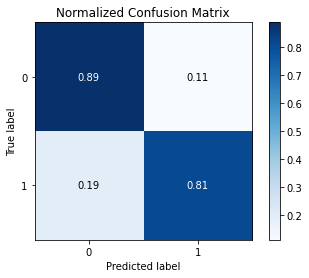

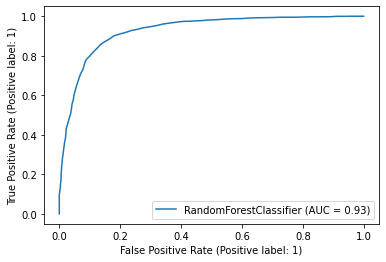

In [6]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no-pos_emo', 'pos_emo']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [7]:
df_val = pd.read_csv('./data/sample_positive_emotion.csv')
df_val

,ad,pos_emo
0,see why everyone is celebrating at hoblit dodg...,1
1,help give people without a home a chance to le...,0
2,i am so proud of what this grassroots team has...,1
3,we have until march 31st to raise money for ou...,0
4,learn how to use the new staffing law to impro...,0
...,...,...
145,Let's build Cameroon. Wake up Cameroonians and...,1
146,Studies show that 98% of all children possess ...,1
147,If you're a developer who wants to make a diff...,1
148,Learn the greatest tips & tricks from the worl...,1


accuracy:   0.653
                     precision    recall  f1-score   support

no-positive emotion       0.74      0.76      0.75       102
   positive emotion       0.45      0.42      0.43        48

           accuracy                           0.65       150
          macro avg       0.60      0.59      0.59       150
       weighted avg       0.65      0.65      0.65       150

confusion matrix:
[[78 24]
 [28 20]]



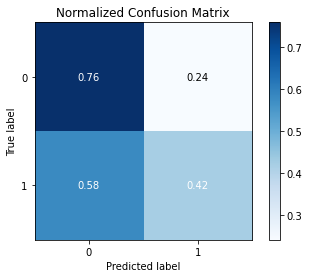

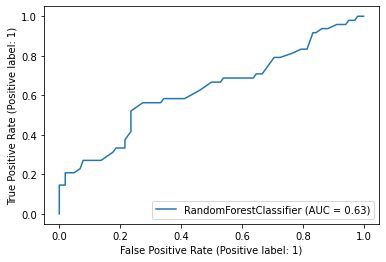

In [8]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['pos_emo']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-positive emotion', 'positive emotion']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)